In [ ]:
# Cellpose创新点：物体内部的场作为目标
# MiSiC创新点：物体边缘轮廓作为拟合的目标
import numpy as np
from skimage.io import imread

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
!pip install cellpose
!pip install libtiff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 168 kB 6.8 MB/s 
     |████████████████████████████████| 48.3 MB 228 kB/s 
     |████████████████████████████████| 3.3 MB 51.7 MB/s 
     |████████████████████████████████| 31.0 MB 1.2 MB/s 
     |████████████████████████████████| 3.5 MB 86.0 MB/s 
     |████████████████████████████████| 34.5 MB 1.2 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 129 kB 8.8 MB/s 
  Created wheel for libtiff: filename=libtiff-0.4.2-cp37-cp37m-linux_x86_64.whl size

In [ ]:
# solve the error: cannot import name '_registerMatType' from 'cv2.cv2'
!pip install opencv-python-headless==4.5.2.52

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.2 MB 1.3 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mask->Flow

In [ ]:
import numpy as np
from skimage.io import imread
from libtiff import TIFF
import matplotlib.pyplot as plt

tif = TIFF.open('/content/drive/MyDrive/Internship/dataset/dataset_combine/masks/seg10018.tif',mode='r')
mask = tif.read_image()

In [ ]:
from cellpose import dynamics, io, plot
'''
return: flows[k][0] is labels[k], flows[k][1] is cell probability, flows[k][2] is Y flow, flows[k][3] is X flow
flows的形状为(4, Ly, Lx), 其中flows[k][0]是标签labels[k], flows[k][1]判断是否是细胞(0, 1)， flows[k][2]是Y方向上的流场，flows[k][3]是X方向上的流场
'''
flow = dynamics.labels_to_flows([mask])
flow_1 = plot.dx_to_circ([flow[0][2], flow[0][3]])

100%|██████████| 1/1 [00:00<00:00, 11.81it/s]
/usr/local/lib/python3.7/dist-packages/cellpose/transforms.py:192: RuntimeWarning: divide by zero encountered in true_divide
  X = (X - x01) / (x99 - x01)
/usr/local/lib/python3.7/dist-packages/cellpose/transforms.py:192: RuntimeWarning: invalid value encountered in true_divide
  X = (X - x01) / (x99 - x01)


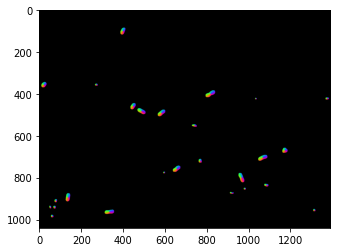

In [ ]:
from PIL import Image  
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
im = Image.fromarray(flow_1)
plt.imshow(im)

# Original Image -> SIM

(1040, 1392, 3)


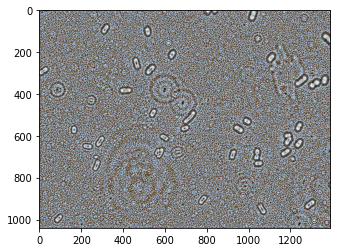

In [ ]:
filepath = '/content/drive/MyDrive/Internship/dataset/dataset_combine/trans/seg20003.tif'
im = imread(filepath)        
tiles = np.array(normalize2max(shapeindex_preprocess(normalize2max(im))))
plt.figure()
im = Image.fromarray(np.uint8(255*tiles))
print(tiles.shape)
plt.imshow(im)
im.save('/content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/seg20003.tif')

# New Config of MiSiC
Output: (256, 256, 1) -> (256, 256, 3)


In [ ]:
# original network structure and weights saved in .h5 file
import h5py
with h5py.File('/content/drive/MyDrive/Internship/Eggs/MiSic_Model/model/MiSiCv2.h5', mode = 'r') as f:
  for key in f:
    print("level 0:", key, f[key])
    o = f[key]
    for key1 in o:
      print("level 1:", key1, o[key1])
      r = o[key1]
      for key2 in r:
        print("level 2:", key2, r[key2])

level 0: model_weights <HDF5 group "/model_weights" (32 members)>
level 1: batch_normalization_14 <HDF5 group "/model_weights/batch_normalization_14" (1 members)>
level 2: batch_normalization_14 <HDF5 group "/model_weights/batch_normalization_14/batch_normalization_14" (4 members)>
level 1: batch_normalization_15 <HDF5 group "/model_weights/batch_normalization_15" (1 members)>
level 2: batch_normalization_15 <HDF5 group "/model_weights/batch_normalization_15/batch_normalization_15" (4 members)>
level 1: batch_normalization_16 <HDF5 group "/model_weights/batch_normalization_16" (1 members)>
level 2: batch_normalization_16 <HDF5 group "/model_weights/batch_normalization_16/batch_normalization_16" (4 members)>
level 1: batch_normalization_17 <HDF5 group "/model_weights/batch_normalization_17" (1 members)>
level 2: batch_normalization_17 <HDF5 group "/model_weights/batch_normalization_17/batch_normalization_17" (4 members)>
level 1: batch_normalization_18 <HDF5 group "/model_weights/batch_

In [ ]:
def model_summary_tofile(model, file_name="model_summary.txt"):
    from contextlib import redirect_stdout
    with open(file_name, 'w') as f:
        with redirect_stdout(f):
            model.summary(line_length=250)

Model: "functional_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 256, 256, 64  9472        ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_14 (BatchN  (None, 256, 256, 64  256        ['conv2d_16[0][0]']              
 ormalization)                  )                                                      

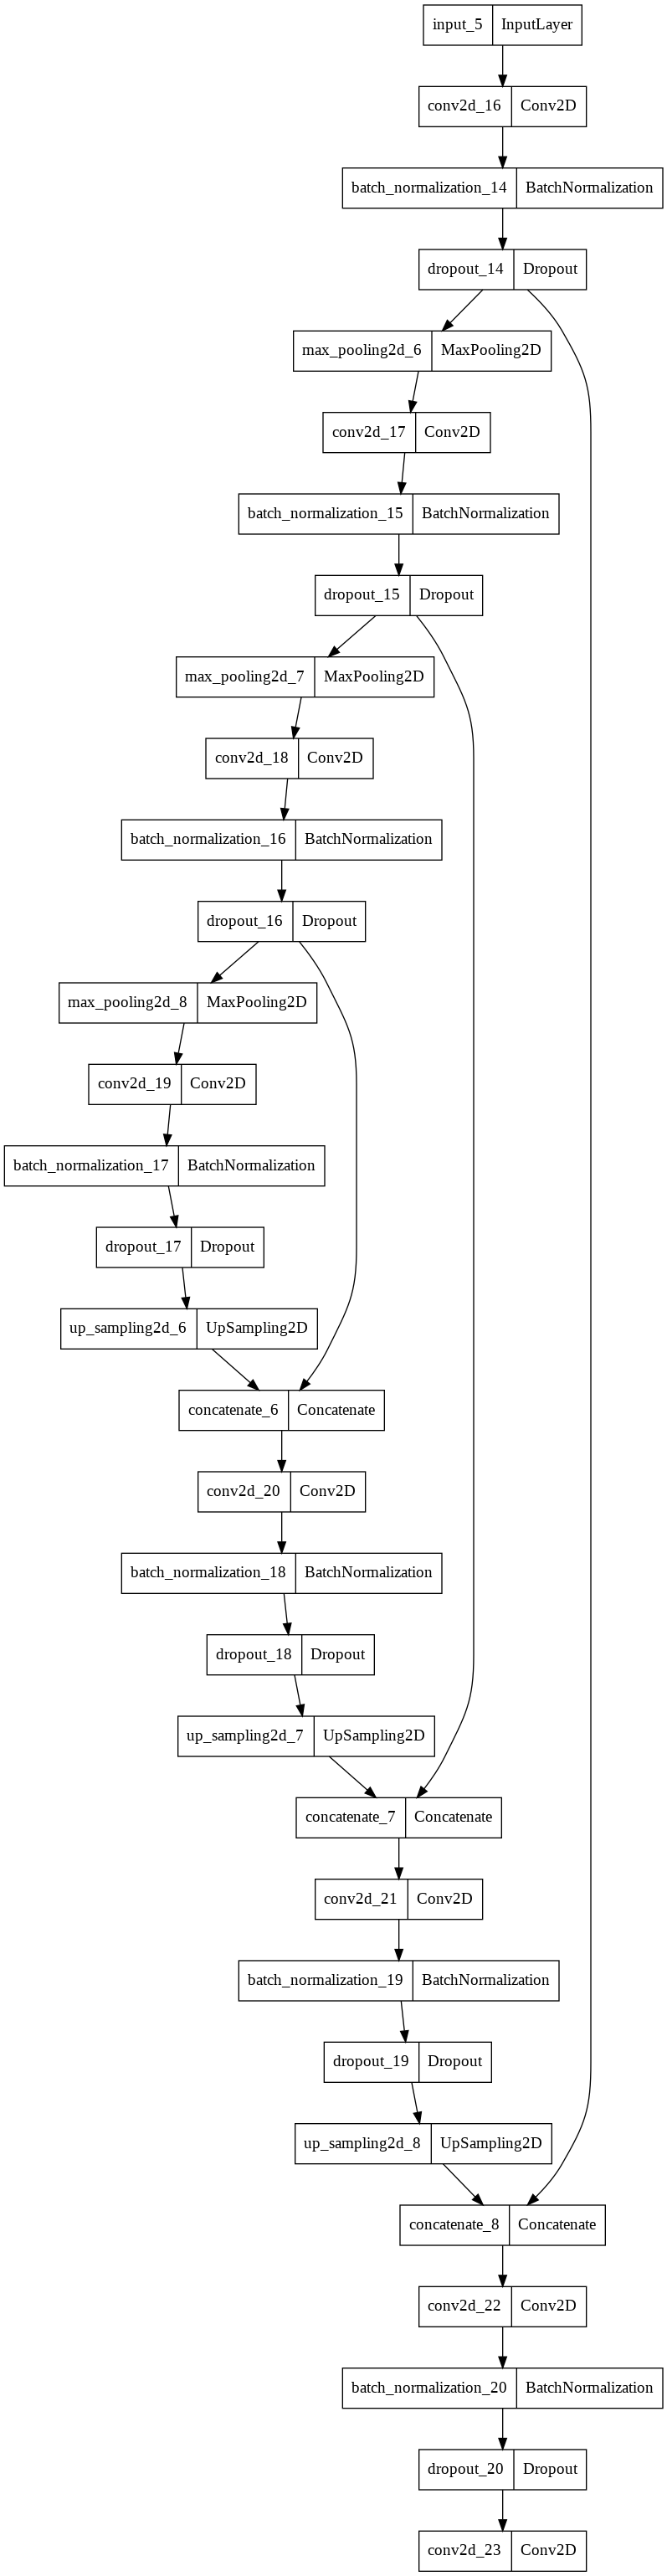

In [ ]:
# adjust the network output dimension
# from (None, 512, 512, 1) to (None, 512, 512, 3)
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image

model = keras.models.load_model('/content/drive/MyDrive/Internship/Eggs/MiSic_Model/model/MiSiCv2.h5')
model.summary()
model_summary_tofile(model, file_name="/content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/model_summary.txt") # save the model summary
keras.utils.plot_model(model)

In [ ]:
# 调整输出维度
'''
config = model.get_config()
layers = config['layers']
print(layers)
'''

# model output: (256, 256, 1) -> (256, 256, 2)
conv2d_23 = Conv2D(filters=3, kernel_size=1)(model.layers[-2].output)
model = Model(inputs=model.input, outputs=conv2d_23)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
keras.utils.plot_model(model)

# save the new model
model.save('/content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/model.h5')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 256, 256, 64  9472        ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_14 (BatchN  (None, 256, 256, 64  256        ['conv2d_16[0][0]']              
 ormalization)                  )                                                           

# Cellpose Original Code

# cellpose.dynamics

In [ ]:
# cellpose.dynamics

import time, os
from scipy.ndimage.filters import maximum_filter1d
import torch
import scipy.ndimage
import numpy as np
import tifffile
from tqdm import trange
from numba import njit, float32, int32, vectorize
import cv2
import fastremap

import logging
dynamics_logger = logging.getLogger(__name__)

from cellpose import utils, metrics, transforms

import torch
from torch import optim, nn
from cellpose import resnet_torch
TORCH_ENABLED = True 
torch_GPU = torch.device('cuda')
torch_CPU = torch.device('cpu')

@njit('(float64[:], int32[:], int32[:], int32, int32, int32, int32)', nogil=True)
def _extend_centers(T,y,x,ymed,xmed,Lx, niter):
    """ run diffusion from center of mask (ymed, xmed) on mask pixels (y, x)
    Parameters
    --------------
    T: float64, array
        _ x Lx array that diffusion is run in
    y: int32, array
        pixels in y inside mask
    x: int32, array
        pixels in x inside mask
    ymed: int32
        center of mask in y
    xmed: int32
        center of mask in x
    Lx: int32
        size of x-dimension of masks
    niter: int32
        number of iterations to run diffusion
    Returns
    ---------------
    T: float64, array
        amount of diffused particles at each pixel
    """

    for t in range(niter):
        T[ymed*Lx + xmed] += 1
        T[y*Lx + x] = 1/9. * (T[y*Lx + x] + T[(y-1)*Lx + x]   + T[(y+1)*Lx + x] +
                                            T[y*Lx + x-1]     + T[y*Lx + x+1] +
                                            T[(y-1)*Lx + x-1] + T[(y-1)*Lx + x+1] +
                                            T[(y+1)*Lx + x-1] + T[(y+1)*Lx + x+1])
    return T



def _extend_centers_gpu(neighbors, centers, isneighbor, Ly, Lx, n_iter=200, device=torch.device('cuda')):
    """ runs diffusion on GPU to generate flows for training images or quality control
    
    neighbors is 9 x pixels in masks, 
    centers are mask centers, 
    isneighbor is valid neighbor boolean 9 x pixels
    
    """
    if device is not None:
        device = device
    nimg = neighbors.shape[0] // 9
    pt = torch.from_numpy(neighbors).to(device)
    
    T = torch.zeros((nimg,Ly,Lx), dtype=torch.double, device=device)
    meds = torch.from_numpy(centers.astype(int)).to(device).long()
    isneigh = torch.from_numpy(isneighbor).to(device)
    for i in range(n_iter):
        T[:, meds[:,0], meds[:,1]] +=1
        Tneigh = T[:, pt[:,:,0], pt[:,:,1]]
        Tneigh *= isneigh
        T[:, pt[0,:,0], pt[0,:,1]] = Tneigh.mean(axis=1)
    del meds, isneigh, Tneigh
    T = torch.log(1.+ T)
    # gradient positions
    grads = T[:, pt[[2,1,4,3],:,0], pt[[2,1,4,3],:,1]]
    del pt
    dy = grads[:,0] - grads[:,1]
    dx = grads[:,2] - grads[:,3]
    del grads
    mu_torch = np.stack((dy.cpu().squeeze(), dx.cpu().squeeze()), axis=-2)
    return mu_torch


def masks_to_flows_gpu(masks, device=None):
    """ convert masks to flows using diffusion from center pixel
    Center of masks where diffusion starts is defined using COM
    Parameters
    -------------
    masks: int, 2D or 3D array
        labelled masks 0=NO masks; 1,2,...=mask labels
    Returns
    -------------
    mu: float, 3D or 4D array 
        flows in Y = mu[-2], flows in X = mu[-1].
        if masks are 3D, flows in Z = mu[0].
    mu_c: float, 2D or 3D array
        for each pixel, the distance to the center of the mask 
        in which it resides 
    """
    if device is None:
        device = torch.device('cuda')

    
    Ly0,Lx0 = masks.shape
    Ly, Lx = Ly0+2, Lx0+2

    masks_padded = np.zeros((Ly, Lx), np.int64)
    masks_padded[1:-1, 1:-1] = masks

    # get mask pixel neighbors
    y, x = np.nonzero(masks_padded)
    neighborsY = np.stack((y, y-1, y+1, 
                           y, y, y-1, 
                           y-1, y+1, y+1), axis=0)
    neighborsX = np.stack((x, x, x, 
                           x-1, x+1, x-1, 
                           x+1, x-1, x+1), axis=0)
    neighbors = np.stack((neighborsY, neighborsX), axis=-1)

    # get mask centers
    slices = scipy.ndimage.find_objects(masks)
    
    centers = np.zeros((masks.max(), 2), 'int')
    for i,si in enumerate(slices):
        if si is not None:
            sr,sc = si
            ly, lx = sr.stop - sr.start + 1, sc.stop - sc.start + 1
            yi,xi = np.nonzero(masks[sr, sc] == (i+1))
            yi = yi.astype(np.int32) + 1 # add padding
            xi = xi.astype(np.int32) + 1 # add padding
            ymed = np.median(yi)
            xmed = np.median(xi)
            imin = np.argmin((xi-xmed)**2 + (yi-ymed)**2)
            xmed = xi[imin]
            ymed = yi[imin]
            centers[i,0] = ymed + sr.start 
            centers[i,1] = xmed + sc.start

    # get neighbor validator (not all neighbors are in same mask)
    neighbor_masks = masks_padded[neighbors[:,:,0], neighbors[:,:,1]]
    isneighbor = neighbor_masks == neighbor_masks[0]
    ext = np.array([[sr.stop - sr.start + 1, sc.stop - sc.start + 1] for sr, sc in slices])
    n_iter = 2 * (ext.sum(axis=1)).max()
    # run diffusion
    mu = _extend_centers_gpu(neighbors, centers, isneighbor, Ly, Lx, 
                             n_iter=n_iter, device=device)

    # normalize
    mu /= (1e-20 + (mu**2).sum(axis=0)**0.5)

    # put into original image
    mu0 = np.zeros((2, Ly0, Lx0))
    mu0[:, y-1, x-1] = mu
    mu_c = np.zeros_like(mu0)
    return mu0, mu_c


def masks_to_flows_cpu(masks, device=None):
    """ convert masks to flows using diffusion from center pixel
    Center of masks where diffusion starts is defined to be the 
    closest pixel to the median of all pixels that is inside the 
    mask. Result of diffusion is converted into flows by computing
    the gradients of the diffusion density map. 
    Parameters
    -------------
    masks: int, 2D array
        labelled masks 0=NO masks; 1,2,...=mask labels
    Returns
    -------------
    mu: float, 3D array 
        flows in Y = mu[-2], flows in X = mu[-1].
        if masks are 3D, flows in Z = mu[0].
    mu_c: float, 2D array
        for each pixel, the distance to the center of the mask 
        in which it resides 
    """
    
    Ly, Lx = masks.shape
    mu = np.zeros((2, Ly, Lx), np.float64)
    mu_c = np.zeros((Ly, Lx), np.float64)
    
    nmask = masks.max()
    slices = scipy.ndimage.find_objects(masks)
    dia = utils.diameters(masks)[0]
    s2 = (.15 * dia)**2
    for i,si in enumerate(slices):
        if si is not None:
            sr,sc = si
            ly, lx = sr.stop - sr.start + 1, sc.stop - sc.start + 1
            y,x = np.nonzero(masks[sr, sc] == (i+1))
            y = y.astype(np.int32) + 1
            x = x.astype(np.int32) + 1
            ymed = np.median(y)
            xmed = np.median(x)
            imin = np.argmin((x-xmed)**2 + (y-ymed)**2)
            xmed = x[imin]
            ymed = y[imin]
            
            d2 = (x-xmed)**2 + (y-ymed)**2
            mu_c[sr.start+y-1, sc.start+x-1] = np.exp(-d2/s2)

            niter = 2*np.int32(np.ptp(x) + np.ptp(y))
            T = np.zeros((ly+2)*(lx+2), np.float64)
            T = _extend_centers(T, y, x, ymed, xmed, np.int32(lx), np.int32(niter))
            T[(y+1)*lx + x+1] = np.log(1.+T[(y+1)*lx + x+1])

            dy = T[(y+1)*lx + x] - T[(y-1)*lx + x]
            dx = T[y*lx + x+1] - T[y*lx + x-1]
            mu[:, sr.start+y-1, sc.start+x-1] = np.stack((dy,dx))

    mu /= (1e-20 + (mu**2).sum(axis=0)**0.5)

    return mu, mu_c



def masks_to_flows(masks, use_gpu=False, device=None):
    """ convert masks to flows using diffusion from center pixel

    Center of masks where diffusion starts is defined to be the 
    closest pixel to the median of all pixels that is inside the 
    mask. Result of diffusion is converted into flows by computing
    the gradients of the diffusion density map. 

    Parameters
    -------------

    masks: int, 2D or 3D array
        labelled masks 0=NO masks; 1,2,...=mask labels

    Returns
    -------------

    mu: float, 3D or 4D array 
        flows in Y = mu[-2], flows in X = mu[-1].
        if masks are 3D, flows in Z = mu[0].

    mu_c: float, 2D or 3D array
        for each pixel, the distance to the center of the mask 
        in which it resides 

    """
    if masks.max() == 0:
        dynamics_logger.warning('empty masks!')
        return np.zeros((2, *masks.shape), 'float32')

    if use_gpu:
        if use_gpu and device is None:
            device = torch_GPU
        elif device is None:
            device = torch_CPU
        masks_to_flows_device = masks_to_flows_gpu
    else:
        masks_to_flows_device = masks_to_flows_cpu
        
    if masks.ndim==3:
        Lz, Ly, Lx = masks.shape
        mu = np.zeros((3, Lz, Ly, Lx), np.float32)
        for z in range(Lz):
            mu0 = masks_to_flows_device(masks[z], device=device)[0]
            mu[[1,2], z] += mu0
        for y in range(Ly):
            mu0 = masks_to_flows_device(masks[:,y], device=device)[0]
            mu[[0,2], :, y] += mu0
        for x in range(Lx):
            mu0 = masks_to_flows_device(masks[:,:,x], device=device)[0]
            mu[[0,1], :, :, x] += mu0
        return mu
    elif masks.ndim==2:
        mu, mu_c = masks_to_flows_device(masks, device=device)
        return mu

    else:
        raise ValueError('masks_to_flows only takes 2D or 3D arrays')


def labels_to_flows_f(labels, files=None, use_gpu=False, device=None, redo_flows=False):
    """ convert labels (list of masks or flows) to flows for training model 

    if files is not None, flows are saved to files to be reused

    Parameters
    --------------

    labels: list of ND-arrays
        labels[k] can be 2D or 3D, if [3 x Ly x Lx] then it is assumed that flows were precomputed.
        Otherwise labels[k][0] or labels[k] (if 2D) is used to create flows and cell probabilities.

    Returns
    --------------

    flows: list of [4 x Ly x Lx] arrays
        flows[k][0] is labels[k], flows[k][1] is cell distance transform, flows[k][2] is Y flow,
        flows[k][3] is X flow, and flows[k][4] is heat distribution

    """
    nimg = len(labels)
    if labels[0].ndim < 3:
        labels = [labels[n][np.newaxis,:,:] for n in range(nimg)]

    if labels[0].shape[0] == 1 or labels[0].ndim < 3 or redo_flows: # flows need to be recomputed
        
        dynamics_logger.info('computing flows for labels')
        
        # compute flows; labels are fixed here to be unique, so they need to be passed back
        # make sure labels are unique!
        labels = [fastremap.renumber(label, in_place=True)[0] for label in labels]
        veci = [masks_to_flows(labels[n][0],use_gpu=use_gpu, device=device) for n in trange(nimg)]
        
        # concatenate labels, distance transform, vector flows, heat (boundary and mask are computed in augmentations)
        flows = [np.concatenate((labels[n], labels[n]>0.5, veci[n]), axis=0).astype(np.float32)
                    for n in range(nimg)]
        if files is not None:
            for flow, file in zip(flows, files):
                file_name = os.path.splitext(file)[0]
                tifffile.imsave(file_name+'_flows.tif', flow)
    else:
        dynamics_logger.info('flows precomputed')
        flows = [labels[n].astype(np.float32) for n in range(nimg)]
    return flows



@njit(['(int16[:,:,:], float32[:], float32[:], float32[:,:])', 
        '(float32[:,:,:], float32[:], float32[:], float32[:,:])'], cache=True)
def map_coordinates(I, yc, xc, Y):
    """
    bilinear interpolation of image 'I' in-place with ycoordinates yc and xcoordinates xc to Y
    
    Parameters
    -------------
    I : C x Ly x Lx
    yc : ni
        new y coordinates
    xc : ni
        new x coordinates
    Y : C x ni
        I sampled at (yc,xc)
    """
    C,Ly,Lx = I.shape
    yc_floor = yc.astype(np.int32)
    xc_floor = xc.astype(np.int32)
    yc = yc - yc_floor
    xc = xc - xc_floor
    for i in range(yc_floor.shape[0]):
        yf = min(Ly-1, max(0, yc_floor[i]))
        xf = min(Lx-1, max(0, xc_floor[i]))
        yf1= min(Ly-1, yf+1)
        xf1= min(Lx-1, xf+1)
        y = yc[i]
        x = xc[i]
        for c in range(C):
            Y[c,i] = (np.float32(I[c, yf, xf]) * (1 - y) * (1 - x) +
                      np.float32(I[c, yf, xf1]) * (1 - y) * x +
                      np.float32(I[c, yf1, xf]) * y * (1 - x) +
                      np.float32(I[c, yf1, xf1]) * y * x )



def steps2D_interp(p, dP, niter, use_gpu=False, device=None):
    shape = dP.shape[1:]
    if use_gpu:
        if device is None:
            device = torch_GPU
        shape = np.array(shape)[[1,0]].astype('float')-1  # Y and X dimensions (dP is 2.Ly.Lx), flipped X-1, Y-1
        pt = torch.from_numpy(p[[1,0]].T).float().to(device).unsqueeze(0).unsqueeze(0) # p is n_points by 2, so pt is [1 1 2 n_points]
        im = torch.from_numpy(dP[[1,0]]).float().to(device).unsqueeze(0) #covert flow numpy array to tensor on GPU, add dimension 
        # normalize pt between  0 and  1, normalize the flow
        for k in range(2): 
            im[:,k,:,:] *= 2./shape[k]
            pt[:,:,:,k] /= shape[k]
            
        # normalize to between -1 and 1
        pt = pt*2-1 
        
        #here is where the stepping happens
        for t in range(niter):
            # align_corners default is False, just added to suppress warning
            dPt = torch.nn.functional.grid_sample(im, pt, align_corners=False)
            
            for k in range(2): #clamp the final pixel locations
                pt[:,:,:,k] = torch.clamp(pt[:,:,:,k] + dPt[:,k,:,:], -1., 1.)
            

        #undo the normalization from before, reverse order of operations 
        pt = (pt+1)*0.5
        for k in range(2): 
            pt[:,:,:,k] *= shape[k]        
        
        p =  pt[:,:,:,[1,0]].cpu().numpy().squeeze().T
        return p

    else:
        dPt = np.zeros(p.shape, np.float32)
            
        for t in range(niter):
            map_coordinates(dP.astype(np.float32), p[0], p[1], dPt)
            for k in range(len(p)):
                p[k] = np.minimum(shape[k]-1, np.maximum(0, p[k] + dPt[k]))
        return p


@njit('(float32[:,:,:,:],float32[:,:,:,:], int32[:,:], int32)', nogil=True)
def steps3D(p, dP, inds, niter):
    """ run dynamics of pixels to recover masks in 3D
    
    Euler integration of dynamics dP for niter steps

    Parameters
    ----------------

    p: float32, 4D array
        pixel locations [axis x Lz x Ly x Lx] (start at initial meshgrid)

    dP: float32, 4D array
        flows [axis x Lz x Ly x Lx]

    inds: int32, 2D array
        non-zero pixels to run dynamics on [npixels x 3]

    niter: int32
        number of iterations of dynamics to run

    Returns
    ---------------

    p: float32, 4D array
        final locations of each pixel after dynamics

    """
    shape = p.shape[1:]
    for t in range(niter):
        #pi = p.astype(np.int32)
        for j in range(inds.shape[0]):
            z = inds[j,0]
            y = inds[j,1]
            x = inds[j,2]
            p0, p1, p2 = int(p[0,z,y,x]), int(p[1,z,y,x]), int(p[2,z,y,x])
            p[0,z,y,x] = min(shape[0]-1, max(0, p[0,z,y,x] + dP[0,p0,p1,p2]))
            p[1,z,y,x] = min(shape[1]-1, max(0, p[1,z,y,x] + dP[1,p0,p1,p2]))
            p[2,z,y,x] = min(shape[2]-1, max(0, p[2,z,y,x] + dP[2,p0,p1,p2]))
    return p


@njit('(float32[:,:,:], float32[:,:,:], int32[:,:], int32)', nogil=True)
def steps2D(p, dP, inds, niter):
    """ run dynamics of pixels to recover masks in 2D
    
    Euler integration of dynamics dP for niter steps

    Parameters
    ----------------

    p: float32, 3D array
        pixel locations [axis x Ly x Lx] (start at initial meshgrid)

    dP: float32, 3D array
        flows [axis x Ly x Lx]

    inds: int32, 2D array
        non-zero pixels to run dynamics on [npixels x 2]

    niter: int32
        number of iterations of dynamics to run

    Returns
    ---------------

    p: float32, 3D array
        final locations of each pixel after dynamics

    """
    shape = p.shape[1:]
    for t in range(niter):
        for j in range(inds.shape[0]):
            # starting coordinates
            y = inds[j,0]
            x = inds[j,1]
            p0, p1 = int(p[0,y,x]), int(p[1,y,x])
            step = dP[:,p0,p1]
            for k in range(p.shape[0]):
                p[k,y,x] = min(shape[k]-1, max(0, p[k,y,x] + step[k]))
    return p


def follow_flows(dP, mask=None, niter=200, interp=True, use_gpu=True, device=None):
    """ define pixels and run dynamics to recover masks in 2D
    
    Pixels are meshgrid. Only pixels with non-zero cell-probability
    are used (as defined by inds)

    Parameters
    ----------------

    dP: float32, 3D or 4D array
        flows [axis x Ly x Lx] or [axis x Lz x Ly x Lx]
    
    mask: (optional, default None)
        pixel mask to seed masks. Useful when flows have low magnitudes.

    niter: int (optional, default 200)
        number of iterations of dynamics to run

    interp: bool (optional, default True)
        interpolate during 2D dynamics (not available in 3D) 
        (in previous versions + paper it was False)

    use_gpu: bool (optional, default False)
        use GPU to run interpolated dynamics (faster than CPU)


    Returns
    ---------------

    p: float32, 3D or 4D array
        final locations of each pixel after dynamics; [axis x Ly x Lx] or [axis x Lz x Ly x Lx]

    inds: int32, 3D or 4D array
        indices of pixels used for dynamics; [axis x Ly x Lx] or [axis x Lz x Ly x Lx]

    """
    shape = np.array(dP.shape[1:]).astype(np.int32)
    niter = np.uint32(niter)
    if len(shape)>2:
        p = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]),
                np.arange(shape[2]), indexing='ij')
        p = np.array(p).astype(np.float32)
        # run dynamics on subset of pixels
        inds = np.array(np.nonzero(np.abs(dP[0])>1e-3)).astype(np.int32).T
        p = steps3D(p, dP, inds, niter)
    else:
        p = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), indexing='ij')
        p = np.array(p).astype(np.float32)

        inds = np.array(np.nonzero(np.abs(dP[0])>1e-3)).astype(np.int32).T
        
        if inds.ndim < 2 or inds.shape[0] < 5:
            dynamics_logger.warning('WARNING: no mask pixels found')
            return p, None
        
        if not interp:
            p = steps2D(p, dP.astype(np.float32), inds, niter)
            
        else:
            p_interp = steps2D_interp(p[:,inds[:,0], inds[:,1]], dP, niter, use_gpu=use_gpu, device=device)            
            p[:,inds[:,0],inds[:,1]] = p_interp
    return p, inds


def remove_bad_flow_masks(masks, flows, threshold=0.4, use_gpu=False, device=None):
    """ remove masks which have inconsistent flows 
    
    Uses metrics.flow_error to compute flows from predicted masks 
    and compare flows to predicted flows from network. Discards 
    masks with flow errors greater than the threshold.

    Parameters
    ----------------

    masks: int, 2D or 3D array
        labelled masks, 0=NO masks; 1,2,...=mask labels,
        size [Ly x Lx] or [Lz x Ly x Lx]

    flows: float, 3D or 4D array
        flows [axis x Ly x Lx] or [axis x Lz x Ly x Lx]

    threshold: float (optional, default 0.4)
        masks with flow error greater than threshold are discarded.

    Returns
    ---------------

    masks: int, 2D or 3D array
        masks with inconsistent flow masks removed, 
        0=NO masks; 1,2,...=mask labels,
        size [Ly x Lx] or [Lz x Ly x Lx]
    
    """
    merrors, _ = metrics.flow_error(masks, flows, use_gpu, device)
    badi = 1+(merrors>threshold).nonzero()[0]
    masks[np.isin(masks, badi)] = 0
    return masks


def get_masks(p, iscell=None, rpad=20):
    """ create masks using pixel convergence after running dynamics
    
    Makes a histogram of final pixel locations p, initializes masks 
    at peaks of histogram and extends the masks from the peaks so that
    they include all pixels with more than 2 final pixels p. Discards 
    masks with flow errors greater than the threshold. 
    Parameters
    ----------------
    p: float32, 3D or 4D array
        final locations of each pixel after dynamics,
        size [axis x Ly x Lx] or [axis x Lz x Ly x Lx].
    iscell: bool, 2D or 3D array
        if iscell is not None, set pixels that are 
        iscell False to stay in their original location.
    rpad: int (optional, default 20)
        histogram edge padding
    threshold: float (optional, default 0.4)
        masks with flow error greater than threshold are discarded 
        (if flows is not None)
    flows: float, 3D or 4D array (optional, default None)
        flows [axis x Ly x Lx] or [axis x Lz x Ly x Lx]. If flows
        is not None, then masks with inconsistent flows are removed using 
        `remove_bad_flow_masks`.
    Returns
    ---------------
    M0: int, 2D or 3D array
        masks with inconsistent flow masks removed, 
        0=NO masks; 1,2,...=mask labels,
        size [Ly x Lx] or [Lz x Ly x Lx]
    
    """
    
    pflows = []
    edges = []
    shape0 = p.shape[1:]
    dims = len(p)
    if iscell is not None:
        if dims==3:
            inds = np.meshgrid(np.arange(shape0[0]), np.arange(shape0[1]),
                np.arange(shape0[2]), indexing='ij')
        elif dims==2:
            inds = np.meshgrid(np.arange(shape0[0]), np.arange(shape0[1]),
                     indexing='ij')
        for i in range(dims):
            p[i, ~iscell] = inds[i][~iscell]

    for i in range(dims):
        pflows.append(p[i].flatten().astype('int32'))
        edges.append(np.arange(-.5-rpad, shape0[i]+.5+rpad, 1))

    h,_ = np.histogramdd(tuple(pflows), bins=edges)
    hmax = h.copy()
    for i in range(dims):
        hmax = maximum_filter1d(hmax, 5, axis=i)

    seeds = np.nonzero(np.logical_and(h-hmax>-1e-6, h>10))
    Nmax = h[seeds]
    isort = np.argsort(Nmax)[::-1]
    for s in seeds:
        s = s[isort]

    pix = list(np.array(seeds).T)

    shape = h.shape
    if dims==3:
        expand = np.nonzero(np.ones((3,3,3)))
    else:
        expand = np.nonzero(np.ones((3,3)))
    for e in expand:
        e = np.expand_dims(e,1)

    for iter in range(5):
        for k in range(len(pix)):
            if iter==0:
                pix[k] = list(pix[k])
            newpix = []
            iin = []
            for i,e in enumerate(expand):
                epix = e[:,np.newaxis] + np.expand_dims(pix[k][i], 0) - 1
                epix = epix.flatten()
                iin.append(np.logical_and(epix>=0, epix<shape[i]))
                newpix.append(epix)
            iin = np.all(tuple(iin), axis=0)
            for p in newpix:
                p = p[iin]
            newpix = tuple(newpix)
            igood = h[newpix]>2
            for i in range(dims):
                pix[k][i] = newpix[i][igood]
            if iter==4:
                pix[k] = tuple(pix[k])
    
    M = np.zeros(h.shape, np.uint32)
    for k in range(len(pix)):
        M[pix[k]] = 1+k
        
    for i in range(dims):
        pflows[i] = pflows[i] + rpad
    M0 = M[tuple(pflows)]

    # remove big masks
    uniq, counts = fastremap.unique(M0, return_counts=True)
    big = np.prod(shape0) * 0.4
    bigc = uniq[counts > big]
    if len(bigc) > 0 and (len(bigc)>1 or bigc[0]!=0):
        M0 = fastremap.mask(M0, bigc)
    fastremap.renumber(M0, in_place=True) #convenient to guarantee non-skipped labels
    M0 = np.reshape(M0, shape0)
    return M0


def compute_masks(dP, cellprob, p=None, niter=200, 
                   cellprob_threshold=0.0,
                   flow_threshold=0.4, interp=True, do_3D=False, 
                   min_size=15, resize=None, 
                   use_gpu=False,device=None):
    """ compute masks using dynamics from dP, cellprob, and boundary """
    
    cp_mask = cellprob > cellprob_threshold 

    if np.any(cp_mask): #mask at this point is a cell cluster binary map, not labels     
        # follow flows
        if p is None:
            p, inds = follow_flows(dP * cp_mask / 5., niter=niter, interp=interp, 
                                            use_gpu=use_gpu, device=device)
            if inds is None:
                dynamics_logger.info('No cell pixels found.')
                shape = resize if resize is not None else cellprob.shape
                mask = np.zeros(shape, np.uint16)
                p = np.zeros((len(shape), *shape), np.uint16)
                return mask, p
        
        #calculate masks
        mask = get_masks(p, iscell=cp_mask)
            
        # flow thresholding factored out of get_masks
        if not do_3D:
            shape0 = p.shape[1:]
            if mask.max()>0 and flow_threshold is not None and flow_threshold > 0:
                # make sure labels are unique at output of get_masks
                mask = remove_bad_flow_masks(mask, dP, threshold=flow_threshold, use_gpu=use_gpu, device=device)
        
        if resize is not None:
            #if verbose:
            #    dynamics_logger.info(f'resizing output with resize = {resize}')
            if mask.max() > 2**16-1:
                recast = True
                mask = mask.astype(np.float32)
            else:
                recast = False
                mask = mask.astype(np.uint16)
            mask = transforms.resize_image(mask, resize[0], resize[1], interpolation=cv2.INTER_NEAREST)
            if recast:
                mask = mask.astype(np.uint32)
            Ly,Lx = mask.shape
        elif mask.max() < 2**16:
            mask = mask.astype(np.uint16)

    else: # nothing to compute, just make it compatible
        dynamics_logger.info('No cell pixels found.')
        shape = resize if resize is not None else cellprob.shape
        mask = np.zeros(shape, np.uint16)
        p = np.zeros((len(shape), *shape), np.uint16)
        return mask, p


    # moving the cleanup to the end helps avoid some bugs arising from scaling...
    # maybe better would be to rescale the min_size and hole_size parameters to do the
    # cleanup at the prediction scale, or switch depending on which one is bigger... 
    mask = utils.fill_holes_and_remove_small_masks(mask, min_size=min_size)

    if mask.dtype==np.uint32:
        dynamics_logger.warning('more than 65535 masks in image, masks returned as np.uint32')

    return mask, p

# cellpose.plot

In [ ]:
# cellpose.plot

import os
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from cellpose import utils, io, transforms

try:
    import matplotlib
    MATPLOTLIB_ENABLED = True 
except:
    MATPLOTLIB_ENABLED = False

try:
    from skimage import color
    from skimage.segmentation import find_boundaries
    SKIMAGE_ENABLED = True 
except:
    SKIMAGE_ENABLED = False

# modified to use sinebow color
def dx_to_circ_f(dP,transparency=False,mask=None):
    """ dP is 2 x Y x X => 'optic' flow representation 
    
    Parameters
    -------------
    
    dP: 2xLyxLx array
        Flow field components [dy,dx]
        
    transparency: bool, default False
        magnitude of flow controls opacity, not lightness (clear background)
        
    mask: 2D array 
        Multiplies each RGB component to suppress noise
    
    """
    
    dP = np.array(dP)
    mag = np.clip(transforms.normalize99(np.sqrt(np.sum(dP**2,axis=0))), 0, 1.)
    angles = np.arctan2(dP[1], dP[0])+np.pi
    a = 2
    r = ((np.cos(angles)+1)/a)
    g = ((np.cos(angles+2*np.pi/3)+1)/a)
    b =((np.cos(angles+4*np.pi/3)+1)/a)
    
    if transparency:
        im = np.stack((r,g,b,mag),axis=-1)
    else:
        im = np.stack((r*mag,g*mag,b*mag),axis=-1)
        
    if mask is not None and transparency and dP.shape[0]<3:
        im[:,:,-1] *= mask
        
    im = (np.clip(im, 0, 1) * 255).astype(np.uint8)
    return im


def show_segmentation(fig, img, maski, flowi, channels=[0,0], file_name=None):
    """ plot segmentation results (like on website)
    
    Can save each panel of figure with file_name option. Use channels option if
    img input is not an RGB image with 3 channels.
    
    Parameters
    -------------

    fig: matplotlib.pyplot.figure
        figure in which to make plot

    img: 2D or 3D array
        image input into cellpose

    maski: int, 2D array
        for image k, masks[k] output from Cellpose.eval, where 0=NO masks; 1,2,...=mask labels

    flowi: int, 2D array 
        for image k, flows[k][0] output from Cellpose.eval (RGB of flows)

    channels: list of int (optional, default [0,0])
        channels used to run Cellpose, no need to use if image is RGB

    file_name: str (optional, default None)
        file name of image, if file_name is not None, figure panels are saved
        
    seg_norm: bool (optional, default False)
        improve cell visibility under labels
        

    """
    if not MATPLOTLIB_ENABLED:
        raise ImportError("matplotlib not installed, install with 'pip install matplotlib'")
    ax = fig.add_subplot(1,4,1)
    img0 = img.copy()

    if img0.shape[0] < 4:
        img0 = np.transpose(img0, (1,2,0))
    if img0.shape[-1] < 3 or img0.ndim < 3:
        img0 = image_to_rgb(img0, channels=channels)
    else:
        if img0.max()<=50.0:
            img0 = np.uint8(np.clip(img0*255, 0, 1))
    ax.imshow(img0)
    ax.set_title('original image')
    ax.axis('off')

    outlines = utils.masks_to_outlines(maski)

    overlay = mask_overlay(img0, maski)

    ax = fig.add_subplot(1,4,2)
    outX, outY = np.nonzero(outlines)
    imgout= img0.copy()
    imgout[outX, outY] = np.array([255,0,0]) # pure red

    ax.imshow(imgout)
    ax.set_title('predicted outlines')
    ax.axis('off')

    ax = fig.add_subplot(1,4,3)
    ax.imshow(overlay)
    ax.set_title('predicted masks')
    ax.axis('off')

    ax = fig.add_subplot(1,4,4)
    ax.imshow(flowi)
    ax.set_title('predicted cell pose')
    ax.axis('off')

    if file_name is not None:
        save_path = os.path.splitext(file_name)[0]
        io.imsave(save_path + '_overlay.jpg', overlay)
        io.imsave(save_path + '_outlines.jpg', imgout)
        io.imsave(save_path + '_flows.jpg', flowi)


def mask_rgb(masks, colors=None):
    """ masks in random rgb colors

    Parameters
    ----------------

    masks: int, 2D array
        masks where 0=NO masks; 1,2,...=mask labels

    colors: int, 2D array (optional, default None)
        size [nmasks x 3], each entry is a color in 0-255 range

    Returns
    ----------------

    RGB: uint8, 3D array
        array of masks overlaid on grayscale image

    """
    if colors is not None:
        if colors.max()>1:
            colors = np.float32(colors)
            colors /= 255
        colors = utils.rgb_to_hsv(colors)
    
    HSV = np.zeros((masks.shape[0], masks.shape[1], 3), np.float32)
    HSV[:,:,2] = 1.0
    for n in range(int(masks.max())):
        ipix = (masks==n+1).nonzero()
        if colors is None:
            HSV[ipix[0],ipix[1],0] = np.random.rand()
        else:
            HSV[ipix[0],ipix[1],0] = colors[n,0]
        HSV[ipix[0],ipix[1],1] = np.random.rand()*0.5+0.5
        HSV[ipix[0],ipix[1],2] = np.random.rand()*0.5+0.5
    RGB = (utils.hsv_to_rgb(HSV) * 255).astype(np.uint8)
    return RGB


def mask_overlay(img, masks, colors=None):
    """ overlay masks on image (set image to grayscale)

    Parameters
    ----------------

    img: int or float, 2D or 3D array
        img is of size [Ly x Lx (x nchan)]

    masks: int, 2D array
        masks where 0=NO masks; 1,2,...=mask labels

    colors: int, 2D array (optional, default None)
        size [nmasks x 3], each entry is a color in 0-255 range

    Returns
    ----------------

    RGB: uint8, 3D array
        array of masks overlaid on grayscale image

    """
    if colors is not None:
        if colors.max()>1:
            colors = np.float32(colors)
            colors /= 255
        colors = utils.rgb_to_hsv(colors)
    if img.ndim>2:
        img = img.astype(np.float32).mean(axis=-1)
    else:
        img = img.astype(np.float32)
    
    HSV = np.zeros((img.shape[0], img.shape[1], 3), np.float32)
    HSV[:,:,2] = np.clip((img / 255. if img.max() > 1 else img) * 1.5, 0, 1)
    hues = np.linspace(0, 1, masks.max()+1)[np.random.permutation(masks.max())]
    for n in range(int(masks.max())):
        ipix = (masks==n+1).nonzero()
        if colors is None:
            HSV[ipix[0],ipix[1],0] = hues[n]
        else:
            HSV[ipix[0],ipix[1],0] = colors[n,0]
        HSV[ipix[0],ipix[1],1] = 1.0
    RGB = (utils.hsv_to_rgb(HSV) * 255).astype(np.uint8)
    return RGB


def image_to_rgb(img0, channels=[0,0]):
    """ image is 2 x Ly x Lx or Ly x Lx x 2 - change to RGB Ly x Lx x 3 """
    img = img0.copy()
    img = img.astype(np.float32)
    if img.ndim<3:
        img = img[:,:,np.newaxis]
    if img.shape[0]<5:
        img = np.transpose(img, (1,2,0))
    if channels[0]==0:
        img = img.mean(axis=-1)[:,:,np.newaxis]
    for i in range(img.shape[-1]):
        if np.ptp(img[:,:,i])>0:
            img[:,:,i] = np.clip(transforms.normalize99(img[:,:,i]), 0, 1)
            img[:,:,i] = np.clip(img[:,:,i], 0, 1)
    img *= 255
    img = np.uint8(img)
    RGB = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
    if img.shape[-1]==1:
        RGB = np.tile(img,(1,1,3))
    else:
        RGB[:,:,channels[0]-1] = img[:,:,0]
        if channels[1] > 0:
            RGB[:,:,channels[1]-1] = img[:,:,1]
    return RGB


def interesting_patch(mask, bsize=130):
    """ get patch of size bsize x bsize with most masks """
    Ly,Lx = mask.shape
    m = np.float32(mask>0)
    m = gaussian_filter(m, bsize/2)
    y,x = np.unravel_index(np.argmax(m), m.shape)
    ycent = max(bsize//2, min(y, Ly-bsize//2))
    xcent = max(bsize//2, min(x, Lx-bsize//2))
    patch = [np.arange(ycent-bsize//2, ycent+bsize//2, 1, int),
             np.arange(xcent-bsize//2, xcent+bsize//2, 1, int)]
    return patch


def disk(med, r, Ly, Lx):
    """ returns pixels of disk with radius r and center med """
    yy, xx = np.meshgrid(np.arange(0,Ly,1,int), np.arange(0,Lx,1,int),
                         indexing='ij')
    inds = ((yy-med[0])**2 + (xx-med[1])**2)**0.5 <= r
    y = yy[inds].flatten()
    x = xx[inds].flatten()
    return y,x


def outline_view(img0,maski,color=[1,0,0], mode='inner'):
    """
    Generates a red outline overlay onto image. 
    """
#     img0 = utils.rescale(img0)
    if len(img0.shape)<3:
#         img0 = image_to_rgb(img0) broken, transposing some images...
        img0 = np.stack([img0]*3,axis=-1)
    
    if SKIMAGE_ENABLED:
        outlines = find_boundaries(maski,mode=mode) #not using masks_to_outlines as that gives border 'outlines'
    else:
        outlines = utils.masks_to_outlines(maski,mode=mode) #not using masks_to_outlines as that gives border 'outlines'
    outY, outX = np.nonzero(outlines)
    imgout = img0.copy()
#     imgout[outY, outX] = np.array([255,0,0]) #pure red
    imgout[outY, outX] = np.array(color)

    return imgout

# cellpose.transforms

In [ ]:
# cellpose.transforms

import numpy as np
import warnings
import cv2

import logging
transforms_logger = logging.getLogger(__name__)

from cellpose import dynamics, utils

def _taper_mask(ly=224, lx=224, sig=7.5):
    bsize = max(224, max(ly, lx))
    xm = np.arange(bsize)
    xm = np.abs(xm - xm.mean())
    mask = 1/(1 + np.exp((xm - (bsize/2-20)) / sig))
    mask = mask * mask[:, np.newaxis]
    mask = mask[bsize//2-ly//2 : bsize//2+ly//2+ly%2, 
                bsize//2-lx//2 : bsize//2+lx//2+lx%2]
    return mask

def unaugment_tiles(y, unet=False):
    """ reverse test-time augmentations for averaging

    Parameters
    ----------

    y: float32
        array that's ntiles_y x ntiles_x x chan x Ly x Lx where chan = (dY, dX, cell prob)

    unet: bool (optional, False)
        whether or not unet output or cellpose output
    
    Returns
    -------

    y: float32

    """
    for j in range(y.shape[0]):
        for i in range(y.shape[1]):
            if j%2==0 and i%2==1:
                y[j,i] = y[j,i, :,::-1, :]
                if not unet:
                    y[j,i,0] *= -1
            elif j%2==1 and i%2==0:
                y[j,i] = y[j,i, :,:, ::-1]
                if not unet:
                    y[j,i,1] *= -1
            elif j%2==1 and i%2==1:
                y[j,i] = y[j,i, :,::-1, ::-1]
                if not unet:
                    y[j,i,0] *= -1
                    y[j,i,1] *= -1
    return y


def average_tiles(y, ysub, xsub, Ly, Lx):
    """ average results of network over tiles

    Parameters
    -------------

    y: float, [ntiles x nclasses x bsize x bsize]
        output of cellpose network for each tile

    ysub : list
        list of arrays with start and end of tiles in Y of length ntiles

    xsub : list
        list of arrays with start and end of tiles in X of length ntiles

    Ly : int
        size of pre-tiled image in Y (may be larger than original image if
        image size is less than bsize)

    Lx : int
        size of pre-tiled image in X (may be larger than original image if
        image size is less than bsize)

    Returns
    -------------

    yf: float32, [nclasses x Ly x Lx]
        network output averaged over tiles

    """
    Navg = np.zeros((Ly,Lx))
    yf = np.zeros((y.shape[1], Ly, Lx), np.float32)
    # taper edges of tiles
    mask = _taper_mask(ly=y.shape[-2], lx=y.shape[-1])
    for j in range(len(ysub)):
        yf[:, ysub[j][0]:ysub[j][1],  xsub[j][0]:xsub[j][1]] += y[j] * mask
        Navg[ysub[j][0]:ysub[j][1],  xsub[j][0]:xsub[j][1]] += mask
    yf /= Navg
    return yf


def make_tiles(imgi, bsize=224, augment=False, tile_overlap=0.1):
    """ make tiles of image to run at test-time

    if augmented, tiles are flipped and tile_overlap=2.
        * original
        * flipped vertically
        * flipped horizontally
        * flipped vertically and horizontally

    Parameters
    ----------
    imgi : float32
        array that's nchan x Ly x Lx

    bsize : float (optional, default 224)
        size of tiles

    augment : bool (optional, default False)
        flip tiles and set tile_overlap=2.

    tile_overlap: float (optional, default 0.1)
        fraction of overlap of tiles

    Returns
    -------
    IMG : float32
        array that's ntiles x nchan x bsize x bsize

    ysub : list
        list of arrays with start and end of tiles in Y of length ntiles

    xsub : list
        list of arrays with start and end of tiles in X of length ntiles

    
    """

    nchan, Ly, Lx = imgi.shape
    if augment:
        bsize = np.int32(bsize)
        # pad if image smaller than bsize
        if Ly<bsize:
            imgi = np.concatenate((imgi, np.zeros((nchan, bsize-Ly, Lx))), axis=1)
            Ly = bsize
        if Lx<bsize:
            imgi = np.concatenate((imgi, np.zeros((nchan, Ly, bsize-Lx))), axis=2)
        Ly, Lx = imgi.shape[-2:]
        # tiles overlap by half of tile size
        ny = max(2, int(np.ceil(2. * Ly / bsize)))
        nx = max(2, int(np.ceil(2. * Lx / bsize)))
        ystart = np.linspace(0, Ly-bsize, ny).astype(int)
        xstart = np.linspace(0, Lx-bsize, nx).astype(int)

        ysub = []
        xsub = []

        # flip tiles so that overlapping segments are processed in rotation
        IMG = np.zeros((len(ystart), len(xstart), nchan,  bsize, bsize), np.float32)
        for j in range(len(ystart)):
            for i in range(len(xstart)):
                ysub.append([ystart[j], ystart[j]+bsize])
                xsub.append([xstart[i], xstart[i]+bsize])
                IMG[j, i] = imgi[:, ysub[-1][0]:ysub[-1][1],  xsub[-1][0]:xsub[-1][1]]
                # flip tiles to allow for augmentation of overlapping segments
                if j%2==0 and i%2==1:
                    IMG[j,i] = IMG[j,i, :,::-1, :]
                elif j%2==1 and i%2==0:
                    IMG[j,i] = IMG[j,i, :,:, ::-1]
                elif j%2==1 and i%2==1:
                    IMG[j,i] = IMG[j,i,:, ::-1, ::-1]
    else:
        tile_overlap = min(0.5, max(0.05, tile_overlap))
        bsizeY, bsizeX = min(bsize, Ly), min(bsize, Lx)
        bsizeY = np.int32(bsizeY)
        bsizeX = np.int32(bsizeX)
        # tiles overlap by 10% tile size
        ny = 1 if Ly<=bsize else int(np.ceil((1.+2*tile_overlap) * Ly / bsize))
        nx = 1 if Lx<=bsize else int(np.ceil((1.+2*tile_overlap) * Lx / bsize))
        ystart = np.linspace(0, Ly-bsizeY, ny).astype(int)
        xstart = np.linspace(0, Lx-bsizeX, nx).astype(int)

        ysub = []
        xsub = []
        IMG = np.zeros((len(ystart), len(xstart), nchan,  bsizeY, bsizeX), np.float32)
        for j in range(len(ystart)):
            for i in range(len(xstart)):
                ysub.append([ystart[j], ystart[j]+bsizeY])
                xsub.append([xstart[i], xstart[i]+bsizeX])
                IMG[j, i] = imgi[:, ysub[-1][0]:ysub[-1][1],  xsub[-1][0]:xsub[-1][1]]
        
    return IMG, ysub, xsub, Ly, Lx


def normalize99(Y, lower=1, upper=99):
    """ normalize image so 0.0 is 1st percentile and 1.0 is 99th percentile """
    X = Y.copy()
    x01 = np.percentile(X, lower)
    x99 = np.percentile(X, upper)
    X = (X - x01) / (x99 - x01)
    return X


def move_axis(img, m_axis=-1, first=True):
    """ move axis m_axis to first or last position """
    if m_axis==-1:
        m_axis = img.ndim-1
    m_axis = min(img.ndim-1, m_axis)
    axes = np.arange(0, img.ndim)
    if first:
        axes[1:m_axis+1] = axes[:m_axis]
        axes[0] = m_axis
    else:
        axes[m_axis:-1] = axes[m_axis+1:]
        axes[-1] = m_axis
    img = img.transpose(tuple(axes))
    return img


# This was edited to fix a bug where single-channel images of shape (y,x) would be 
# transposed to (x,y) if x<y, making the labels no longer correspond to the data. 
def move_min_dim(img, force=False):
    """ move minimum dimension last as channels if < 10, or force==True """
    if len(img.shape) > 2: #only makese sense to do this if channel axis is already present 
        min_dim = min(img.shape)
        if min_dim < 10 or force:
            if img.shape[-1]==min_dim:
                channel_axis = -1
            else:
                channel_axis = (img.shape).index(min_dim)
            img = move_axis(img, m_axis=channel_axis, first=False)
    return img


def update_axis(m_axis, to_squeeze, ndim):
    if m_axis==-1:
        m_axis = ndim-1
    if (to_squeeze==m_axis).sum() == 1:
        m_axis = None
    else:
        inds = np.ones(ndim, bool)
        inds[to_squeeze] = False
        m_axis = np.nonzero(np.arange(0, ndim)[inds]==m_axis)[0]
        if len(m_axis) > 0:
            m_axis = m_axis[0]
        else:
            m_axis = None
    return m_axis

def convert_image(x, channels, channel_axis=None, z_axis=None,
                  do_3D=False, normalize=True, invert=False,
                  nchan=2):
    """ return image with z first, channels last and normalized intensities """
        
    # squeeze image, and if channel_axis or z_axis given, transpose image
    if x.ndim > 3:
        to_squeeze = np.array([int(isq) for isq,s in enumerate(x.shape) if s==1])
        # remove channel axis if number of channels is 1
        if len(to_squeeze) > 0: 
            channel_axis = update_axis(channel_axis, to_squeeze, x.ndim) if channel_axis is not None else channel_axis
            z_axis = update_axis(z_axis, to_squeeze, x.ndim) if z_axis is not None else z_axis
        x = x.squeeze()

    # put z axis first
    if z_axis is not None and x.ndim > 2:
        x = move_axis(x, m_axis=z_axis, first=True)
        if channel_axis is not None:
            channel_axis += 1
        if x.ndim==3:
            x = x[...,np.newaxis]
        
    # put channel axis last
    if channel_axis is not None and x.ndim > 2:
        x = move_axis(x, m_axis=channel_axis, first=False)
    elif x.ndim == 2:
        x = x[:,:,np.newaxis]

    if do_3D :
        if x.ndim < 3:
            transforms_logger.critical('ERROR: cannot process 2D images in 3D mode')
            raise ValueError('ERROR: cannot process 2D images in 3D mode') 
        elif x.ndim<4:
            x = x[...,np.newaxis]

    if channel_axis is None:
        x = move_min_dim(x)
        
    if x.ndim > 3:
        transforms_logger.info('multi-stack tiff read in as having %d planes %d channels'%
                (x.shape[0], x.shape[-1]))

    if channels is not None:
        channels = channels[0] if len(channels)==1 else channels
        if len(channels) < 2:
            transforms_logger.critical('ERROR: two channels not specified')
            raise ValueError('ERROR: two channels not specified') 
        x = reshape(x, channels=channels)
        
    else:
        # code above put channels last
        if x.shape[-1] > nchan:
            transforms_logger.warning('WARNING: more than %d channels given, use "channels" input for specifying channels - just using first %d channels to run processing'%(nchan,nchan))
            x = x[...,:nchan]

        if not do_3D and x.ndim>3:
            transforms_logger.critical('ERROR: cannot process 4D images in 2D mode')
            raise ValueError('ERROR: cannot process 4D images in 2D mode')
            
        if x.shape[-1] < nchan:
            x = np.concatenate((x, 
                                np.tile(np.zeros_like(x), (1,1,nchan-1))), 
                                axis=-1)
            
    if normalize or invert:
        x = normalize_img(x, invert=invert)
        
    return x


def reshape(data, channels=[0,0], chan_first=False):
    """ reshape data using channels

    Parameters
    ----------

    data : numpy array that's (Z x ) Ly x Lx x nchan
        if data.ndim==8 and data.shape[0]<8, assumed to be nchan x Ly x Lx

    channels : list of int of length 2 (optional, default [0,0])
        First element of list is the channel to segment (0=grayscale, 1=red, 2=green, 3=blue).
        Second element of list is the optional nuclear channel (0=none, 1=red, 2=green, 3=blue).
        For instance, to train on grayscale images, input [0,0]. To train on images with cells
        in green and nuclei in blue, input [2,3].

    invert : bool
        invert intensities

    Returns
    -------
    data : numpy array that's (Z x ) Ly x Lx x nchan (if chan_first==False)

    """
    data = data.astype(np.float32)
    if data.ndim < 3:
        data = data[:,:,np.newaxis]
    elif data.shape[0]<8 and data.ndim==3:
        data = np.transpose(data, (1,2,0))

    # use grayscale image
    if data.shape[-1]==1:
        data = np.concatenate((data, np.zeros_like(data)), axis=-1)
    else:
        if channels[0]==0:
            data = data.mean(axis=-1, keepdims=True)
            data = np.concatenate((data, np.zeros_like(data)), axis=-1)
        else:
            chanid = [channels[0]-1]
            if channels[1] > 0:
                chanid.append(channels[1]-1)
            data = data[...,chanid]
            for i in range(data.shape[-1]):
                if np.ptp(data[...,i]) == 0.0:
                    if i==0:
                        warnings.warn("chan to seg' has value range of ZERO")
                    else:
                        warnings.warn("'chan2 (opt)' has value range of ZERO, can instead set chan2 to 0")
            if data.shape[-1]==1:
                data = np.concatenate((data, np.zeros_like(data)), axis=-1)
    if chan_first:
        if data.ndim==4:
            data = np.transpose(data, (3,0,1,2))
        else:
            data = np.transpose(data, (2,0,1))
    return data


def normalize_img(img, axis=-1, invert=False):
    """ normalize each channel of the image so that so that 0.0=1st percentile
    and 1.0=99th percentile of image intensities

    optional inversion

    Parameters
    ------------

    img: ND-array (at least 3 dimensions)

    axis: channel axis to loop over for normalization

    invert: invert image (useful if cells are dark instead of bright)

    Returns
    ---------------

    img: ND-array, float32
        normalized image of same size

    """
    if img.ndim<3:
        error_message = 'Image needs to have at least 3 dimensions'
        transforms_logger.critical(error_message)
        raise ValueError(error_message)

    img = img.astype(np.float32)
    img = np.moveaxis(img, axis, 0)
    for k in range(img.shape[0]):
        # ptp can still give nan's with weird images
        i99 = np.percentile(img[k],99)
        i1 = np.percentile(img[k],1)
        if i99 - i1 > +1e-3: #np.ptp(img[k]) > 1e-3:
            img[k] = normalize99(img[k])
            if invert:
                img[k] = -1*img[k] + 1   
        else:
            img[k] = 0
    img = np.moveaxis(img, 0, axis)
    return img


def reshape_train_test(train_data, train_labels, test_data, test_labels, channels, normalize=True):
    """ check sizes and reshape train and test data for training """
    nimg = len(train_data)
    # check that arrays are correct size
    if nimg != len(train_labels):
        error_message = 'train data and labels not same length'
        transforms_logger.critical(error_message)
        raise ValueError(error_message)
        return
    if train_labels[0].ndim < 2 or train_data[0].ndim < 2:
        error_message = 'training data or labels are not at least two-dimensional'
        transforms_logger.critical(error_message)
        raise ValueError(error_message)
        return

    if train_data[0].ndim > 3:
        error_message = 'training data is more than three-dimensional (should be 2D or 3D array)'
        transforms_logger.critical(error_message)
        raise ValueError(error_message)
        return

    # check if test_data correct length
    if not (test_data is not None and test_labels is not None and
            len(test_data) > 0 and len(test_data)==len(test_labels)):
        test_data = None

    # make data correct shape and normalize it so that 0 and 1 are 1st and 99th percentile of data
    train_data, test_data, run_test = reshape_and_normalize_data(train_data, test_data=test_data, 
                                                                 channels=channels, normalize=normalize)

    if train_data is None:
        error_message = 'training data do not all have the same number of channels'
        transforms_logger.critical(error_message)
        raise ValueError(error_message)
        return

    if not run_test:
        test_data, test_labels = None, None

    return train_data, train_labels, test_data, test_labels, run_test


def reshape_and_normalize_data(train_data, test_data=None, channels=None, normalize=True):
    """ inputs converted to correct shapes for *training* and rescaled so that 0.0=1st percentile
    and 1.0=99th percentile of image intensities in each channel

    Parameters
    --------------

    train_data: list of ND-arrays, float
        list of training images of size [Ly x Lx], [nchan x Ly x Lx], or [Ly x Lx x nchan]

    test_data: list of ND-arrays, float (optional, default None)
        list of testing images of size [Ly x Lx], [nchan x Ly x Lx], or [Ly x Lx x nchan]

    channels: list of int of length 2 (optional, default None)
        First element of list is the channel to segment (0=grayscale, 1=red, 2=green, 3=blue).
        Second element of list is the optional nuclear channel (0=none, 1=red, 2=green, 3=blue).
        For instance, to train on grayscale images, input [0,0]. To train on images with cells
        in green and nuclei in blue, input [2,3].

    normalize: bool (optional, True)
        normalize data so 0.0=1st percentile and 1.0=99th percentile of image intensities in each channel

    Returns
    -------------

    train_data: list of ND-arrays, float
        list of training images of size [2 x Ly x Lx]

    test_data: list of ND-arrays, float (optional, default None)
        list of testing images of size [2 x Ly x Lx]

    run_test: bool
        whether or not test_data was correct size and is useable during training

    """

    # if training data is less than 2D
    run_test = False
    for test, data in enumerate([train_data, test_data]):
        if data is None:
            return train_data, test_data, run_test
        nimg = len(data)
        for i in range(nimg):
            if channels is not None:
                data[i] = move_min_dim(data[i], force=True)
                data[i] = reshape(data[i], channels=channels, chan_first=True)
            if data[i].ndim < 3:
                data[i] = data[i][np.newaxis,:,:]
            if normalize:
                data[i] = normalize_img(data[i], axis=0)
     
        nchan = [data[i].shape[0] for i in range(nimg)]
    run_test = True
    return train_data, test_data, run_test


def resize_image(img0, Ly=None, Lx=None, rsz=None, interpolation=cv2.INTER_LINEAR, no_channels=False):
    """ resize image for computing flows / unresize for computing dynamics

    Parameters
    -------------

    img0: ND-array
        image of size [Y x X x nchan] or [Lz x Y x X x nchan] or [Lz x Y x X]

    Ly: int, optional

    Lx: int, optional

    rsz: float, optional
        resize coefficient(s) for image; if Ly is None then rsz is used

    interpolation: cv2 interp method (optional, default cv2.INTER_LINEAR)

    Returns
    --------------

    imgs: ND-array 
        image of size [Ly x Lx x nchan] or [Lz x Ly x Lx x nchan]

    """
    if Ly is None and rsz is None:
        error_message = 'must give size to resize to or factor to use for resizing'
        transforms_logger.critical(error_message)
        raise ValueError(error_message)

    if Ly is None:
        # determine Ly and Lx using rsz
        if not isinstance(rsz, list) and not isinstance(rsz, np.ndarray):
            rsz = [rsz, rsz]
        if no_channels:
            Ly = int(img0.shape[-2] * rsz[-2])
            Lx = int(img0.shape[-1] * rsz[-1])
        else:
            Ly = int(img0.shape[-3] * rsz[-2])
            Lx = int(img0.shape[-2] * rsz[-1])
    
    # no_channels useful for z-stacks, sot he third dimension is not treated as a channel
    # but if this is called for grayscale images, they first become [Ly,Lx,2] so ndim=3 but 
    if (img0.ndim>2 and no_channels) or (img0.ndim==4 and not no_channels):
        if no_channels:
            imgs = np.zeros((img0.shape[0], Ly, Lx), np.float32)
        else:
            imgs = np.zeros((img0.shape[0], Ly, Lx, img0.shape[-1]), np.float32)
        for i,img in enumerate(img0):
            imgs[i] = cv2.resize(img, (Lx, Ly), interpolation=interpolation)
    else:
        imgs = cv2.resize(img0, (Lx, Ly), interpolation=interpolation)
    return imgs


def pad_image_ND(img0, div=16, extra = 1):
    """ pad image for test-time so that its dimensions are a multiple of 16 (2D or 3D)

    Parameters
    -------------

    img0: ND-array
        image of size [nchan (x Lz) x Ly x Lx]

    div: int (optional, default 16)

    Returns
    --------------

    I: ND-array
        padded image

    ysub: array, int
        yrange of pixels in I corresponding to img0

    xsub: array, int
        xrange of pixels in I corresponding to img0

    """
    Lpad = int(div * np.ceil(img0.shape[-2]/div) - img0.shape[-2])
    xpad1 = extra*div//2 + Lpad//2
    xpad2 = extra*div//2 + Lpad - Lpad//2
    Lpad = int(div * np.ceil(img0.shape[-1]/div) - img0.shape[-1])
    ypad1 = extra*div//2 + Lpad//2
    ypad2 = extra*div//2+Lpad - Lpad//2

    if img0.ndim>3:
        pads = np.array([[0,0], [0,0], [xpad1,xpad2], [ypad1, ypad2]])
    else:
        pads = np.array([[0,0], [xpad1,xpad2], [ypad1, ypad2]])

    I = np.pad(img0,pads, mode='constant')

    Ly, Lx = img0.shape[-2:]
    ysub = np.arange(xpad1, xpad1+Ly)
    xsub = np.arange(ypad1, ypad1+Lx)
    return I, ysub, xsub


def normalize_field(mu):
    mu /= (1e-20 + (mu**2).sum(axis=0)**0.5)
    return mu

def _X2zoom(img, X2=1):
    """ zoom in image

    Parameters
    ----------
    img : numpy array that's Ly x Lx

    Returns
    -------
    img : numpy array that's Ly x Lx

    """
    ny,nx = img.shape[:2]
    img = cv2.resize(img, (int(nx * (2**X2)), int(ny * (2**X2))))
    return img

def _image_resizer(img, resize=512, to_uint8=False):
    """ resize image

    Parameters
    ----------
    img : numpy array that's Ly x Lx

    resize : int
        max size of image returned

    to_uint8 : bool
        convert image to uint8

    Returns
    -------
    img : numpy array that's Ly x Lx, Ly,Lx<resize

    """
    ny,nx = img.shape[:2]
    if to_uint8:
        if img.max()<=255 and img.min()>=0 and img.max()>1:
            img = img.astype(np.uint8)
        else:
            img = img.astype(np.float32)
            img -= img.min()
            img /= img.max()
            img *= 255
            img = img.astype(np.uint8)
    if np.array(img.shape).max() > resize:
        if ny>nx:
            nx = int(nx/ny * resize)
            ny = resize
        else:
            ny = int(ny/nx * resize)
            nx = resize
        shape = (nx,ny)
        img = cv2.resize(img, shape)
        img = img.astype(np.uint8)
    return img


def random_rotate_and_resize(X, Y=None, scale_range=1., xy = (224,224), 
                             do_flip=True, rescale=None, unet=False, random_per_image=True):
    """ augmentation by random rotation and resizing
        X and Y are lists or arrays of length nimg, with dims channels x Ly x Lx (channels optional)
        Parameters
        ----------
        X: LIST of ND-arrays, float
            list of image arrays of size [nchan x Ly x Lx] or [Ly x Lx]
        Y: LIST of ND-arrays, float (optional, default None)
            list of image labels of size [nlabels x Ly x Lx] or [Ly x Lx]. The 1st channel
            of Y is always nearest-neighbor interpolated (assumed to be masks or 0-1 representation).
            If Y.shape[0]==3 and not unet, then the labels are assumed to be [cell probability, Y flow, X flow]. 
            If unet, second channel is dist_to_bound.
        scale_range: float (optional, default 1.0)
            Range of resizing of images for augmentation. Images are resized by
            (1-scale_range/2) + scale_range * np.random.rand()
        xy: tuple, int (optional, default (224,224))
            size of transformed images to return
        do_flip: bool (optional, default True)
            whether or not to flip images horizontally
        rescale: array, float (optional, default None)
            how much to resize images by before performing augmentations
        unet: bool (optional, default False)
        random_per_image: bool (optional, default True)
            different random rotate and resize per image
        Returns
        -------
        imgi: ND-array, float
            transformed images in array [nimg x nchan x xy[0] x xy[1]]
        lbl: ND-array, float
            transformed labels in array [nimg x nchan x xy[0] x xy[1]]
        scale: array, float
            amount each image was resized by
    """
    scale_range = max(0, min(2, float(scale_range)))
    nimg = len(X)
    if X[0].ndim>2:
        nchan = X[0].shape[0]
    else:
        nchan = 1
    imgi  = np.zeros((nimg, nchan, xy[0], xy[1]), np.float32)

    lbl = []
    if Y is not None:
        if Y[0].ndim>2:
            nt = Y[0].shape[0]
        else:
            nt = 1
        lbl = np.zeros((nimg, nt, xy[0], xy[1]), np.float32)

    scale = np.ones(nimg, np.float32)
    
    for n in range(nimg):
        Ly, Lx = X[n].shape[-2:]

        if random_per_image or n==0:
            # generate random augmentation parameters
            flip = np.random.rand()>.5
            theta = np.random.rand() * np.pi * 2
            scale[n] = (1-scale_range/2) + scale_range * np.random.rand()
            if rescale is not None:
                scale[n] *= 1. / rescale[n]
            dxy = np.maximum(0, np.array([Lx*scale[n]-xy[1],Ly*scale[n]-xy[0]]))
            dxy = (np.random.rand(2,) - .5) * dxy

            # create affine transform
            cc = np.array([Lx/2, Ly/2])
            cc1 = cc - np.array([Lx-xy[1], Ly-xy[0]])/2 + dxy
            pts1 = np.float32([cc,cc + np.array([1,0]), cc + np.array([0,1])])
            pts2 = np.float32([cc1,
                    cc1 + scale[n]*np.array([np.cos(theta), np.sin(theta)]),
                    cc1 + scale[n]*np.array([np.cos(np.pi/2+theta), np.sin(np.pi/2+theta)])])
            M = cv2.getAffineTransform(pts1,pts2)

        img = X[n].copy()
        if Y is not None:
            labels = Y[n].copy()
            if labels.ndim<3:
                labels = labels[np.newaxis,:,:]

        if flip and do_flip:
            img = img[..., ::-1]
            if Y is not None:
                labels = labels[..., ::-1]
                if nt > 1 and not unet:
                    labels[2] = -labels[2]

        for k in range(nchan):
            I = cv2.warpAffine(img[k], M, (xy[1],xy[0]), flags=cv2.INTER_LINEAR)
            imgi[n,k] = I

        if Y is not None:
            for k in range(nt):
                if k==0:
                    lbl[n,k] = cv2.warpAffine(labels[k], M, (xy[1],xy[0]), flags=cv2.INTER_NEAREST)
                else:
                    lbl[n,k] = cv2.warpAffine(labels[k], M, (xy[1],xy[0]), flags=cv2.INTER_LINEAR)

            if nt > 1 and not unet:
                v1 = lbl[n,2].copy()
                v2 = lbl[n,1].copy()
                lbl[n,1] = (-v1 * np.sin(-theta) + v2*np.cos(-theta))
                lbl[n,2] = (v1 * np.cos(-theta) + v2*np.sin(-theta))

    return imgi, lbl, scale

# Mask->Flow

In [ ]:
def file_name(file_dir):   
  L = []   
  for root, dirs, files in os.walk(file_dir):  
    for file in files: 
      L.append(file)  
  return L

In [ ]:
# mask -> flow field
# from cellpose import dynamics, io, plot
import os

L = file_name('/content/drive/MyDrive/Internship/dataset/dataset_combine/masks/')
for img_name in L:
  tif = TIFF.open(os.path.join('/content/drive/MyDrive/Internship/dataset/dataset_combine/masks', img_name), mode='r')
  mask = tif.read_image()
  flow = dynamics.labels_to_flows([mask])
  flow_1 = plot.dx_to_circ([flow[0][2], flow[0][3]])
  im = Image.fromarray(flow_1)
  im.save('/content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/flow_mask/' + img_name)

100%|██████████| 1/1 [00:00<00:00, 11.47it/s]
/usr/local/lib/python3.7/dist-packages/cellpose/transforms.py:192: RuntimeWarning: divide by zero encountered in true_divide
  X = (X - x01) / (x99 - x01)
/usr/local/lib/python3.7/dist-packages/cellpose/transforms.py:192: RuntimeWarning: invalid value encountered in true_divide
  X = (X - x01) / (x99 - x01)
100%|██████████| 1/1 [00:00<00:00,  4.26it/s]


# Load new model

In [ ]:
import openpyxl
import skimage.io as io
import cv2
import numpy as np
from skimage.feature import shape_index
from skimage.io import imsave,imread
from skimage.util import view_as_windows
# from misic.misic import *
# from misic.extras import *
from skimage.io import imsave,imread
from skimage.transform import resize,rescale
import numpy as np
from skimage.feature import shape_index
import matplotlib.pyplot as plt

# import from extra.py
import os
import numpy as np
from skimage.transform import resize,rescale
from skimage.util import random_noise
from skimage.io import imread,imsave
from skimage.filters import gaussian
from skimage.feature import shape_index
from skimage.segmentation import watershed
from scipy.ndimage import label
from scipy.ndimage import gaussian_laplace
from skimage.filters import gaussian,laplace
from skimage.exposure import adjust_gamma
from skimage.color import label2rgb
from skimage.morphology import remove_small_objects,remove_small_holes
from scipy.ndimage import label
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import get_file 
import os
import numpy as np
from skimage.feature import shape_index
import tensorflow as tf
import numpy as np
from skimage.util import view_as_windows
import keras
from keras.preprocessing import image
from tensorflow import keras

In [ ]:
# load the new model

import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image

model_1 = keras.models.load_model('/content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/model.h5') # 模型结构存储在Combination_Cellpose_MiSiC
model_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 256, 256, 64  9472        ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_14 (BatchN  (None, 256, 256, 64  256        ['conv2d_16[0][0]']              
 ormalization)                  )                                                           

# Prepare dataset for training
## Input and output
x: Shape-Index-Map

y: Flow Field

In [ ]:
def file_name(file_dir):   
  L = []   
  for root, dirs, files in os.walk(file_dir):  
    for file in files: 
      L.append(file)  
  return L

In [ ]:
size = 256
exclude = 16
def shapeindex_preprocess(im):
    ''' apply shap index map at three scales'''
    sh = np.zeros((im.shape[0],im.shape[1],3))
    if np.max(im) ==0:
        return sh
        
    # pad to minimize edge artifacts                    
    sh[:,:,0] = shape_index(im,1, mode='reflect')
    sh[:,:,1] = shape_index(im,1.5, mode='reflect')
    sh[:,:,2] = shape_index(im,2, mode='reflect')
    return sh

def segment(im, invert = False, exclude = 16):        
    tiles,params = extract_tiles(im[:,:,np.newaxis],size = size,exclude = exclude)          
    tiles = np.array([shapeindex_preprocess(normalize2max(t))  for t in tiles[:,:,:,0]])
    tiles = -tiles if invert else tiles # (35, 256, 256, 3)
    yp = model.predict(tiles)
    return stitch_tiles(yp,params)

def normalize2max(im):
    ''' normalize to max '''
    if np.max(im) == 0:
        return im
    im = im-np.min(im)
    return im/np.max(im)

def getPatch(im,sz):
    ''' get random patch from image of size szXsz '''
    sr,sc = im.shape
    rr = np.random.randint(sr-sz)
    cc = np.random.randint(sc-sz)
    return im[rr:rr+sz,cc:cc+sz],rr,cc


def get_coords(sr,sc,size=256,exclude = 16):
    rr = np.arange(0,sr,size-2*exclude)
    d = (size-2*exclude) - sr%(size-2*exclude)
    rr[-1] = sr-(size-2*exclude) 
    cc = np.arange(0,sc,size-2*exclude)
    d = (size-2*exclude) - sc%(size-2*exclude)
    cc[-1] =sc -(size-2*exclude) 
    rr,cc = np.meshgrid(rr,cc)
    rr = rr.ravel()
    cc = cc.ravel()
    return rr,cc

def extract_tiles(im, size = 512, exclude = 12):
    ''' extract tiles from image of size 'size' to be stiched back such that 'exclude' pixels near border of tile are excluded '''
    size = size-2*exclude

    if len(im.shape)<3:
        im = im[:,:,np.newaxis]
    sr,sc,ch = im.shape 
    
    pad_row = 0 if sr%size == 0 else (int(sr/size)+1) * size - sr
    pad_col = 0 if sc%size == 0 else (int(sc/size)+1) * size - sc
    im1 = np.pad(im,((0,pad_row),(0,pad_col),(0,0)),mode = 'reflect')
    sr1,sc2,_ = im1.shape
    

    rv = np.arange(0,im1.shape[0],size)
    cv = np.arange(0,im1.shape[1],size)
    cc,rr = np.meshgrid(cv,rv)
    positions = np.concatenate((rr.ravel()[:,np.newaxis],cc.ravel()[:,np.newaxis]),axis = 1)
        
    im1 = np.pad(im1,((exclude,exclude),(exclude,exclude),(0,0)),mode = 'reflect')

    params = {}
    params['size'] = size
    params['exclude'] = exclude
    params['pad_row'] = pad_row
    params['pad_col'] = pad_col
    params['im_size'] = [sr1,sc2]
    params['positions'] = positions
    
    patches = view_as_windows(im1,(size+2*exclude,size+2*exclude,ch),size)    
    patches = patches[:,:,0,:,:,:]
    patches = np.reshape(patches,(-1,patches.shape[2],patches.shape[3],patches.shape[4]))

    return patches,params


def stitch_tiles(patches,params):
    ''' stitch tiles generated from extract tiles '''
    size = params['size']
    pad_row = params['pad_row']
    pad_col = params['pad_col']
    im_size = params['im_size']
    positions = params['positions']
    exclude = params['exclude']
        
    
    result = np.zeros((im_size[0],im_size[1],patches.shape[-1]))*1.0
    
    
    for i,pos in enumerate(positions):        
        rr,cc = pos[0],pos[1]    
        result[rr:rr+size,cc:cc+size,:] = patches[i,exclude:-exclude,exclude:-exclude,:]*1.0
    
    if pad_row>0:
        result = result[:-pad_row,:]
    if pad_col>0:
        result = result[:,:-pad_col]
    return result

In [ ]:
# not necessary
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

In [ ]:
from cellpose import dynamics, io, plot

size = 256
exclude = 16

folder_path = os.walk('/content/drive/MyDrive/Internship/Eggs/MiSic_Model/dataset/original_image/')
image_list = []
dataset_x = np.empty(shape=(0, 256, 256, 3))
dataset_y = np.empty(shape=(0, 256, 256, 3))

for path, dir, filelist in folder_path:
  for filename in filelist:
    # load train dataset(x)
    # original image -> extract_tiles(None, 256, 256, 1) -> SIM(None, 256, 256, 3)
    filepath = '/content/drive/MyDrive/Internship/Eggs/MiSic_Model/dataset/original_image/' + filename
    im = imread(filepath)
    tiles, params = extract_tiles(im[:,:,np.newaxis], size = size, exclude = exclude)  # extract_tiles
    tiles = np.array([shapeindex_preprocess(normalize2max(t)) for t in tiles[:,:,:,0]]) # sim
    dataset_x = np.concatenate([dataset_x, tiles])

    # load train dataset(y)
    # load the flow field masks
    '''
    # load the rgb flow mask
    filepath = '/content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/flow_mask/' + filename
    im = imread(filepath)
    tiles, params = extract_tiles(im, size = size, exclude = exclude)  # extract_tiles
    dataset_y = np.concatenate([dataset_y, tiles])
    '''

    # load the flow[0][2:]
    filepath = '/content/drive/MyDrive/Internship/dataset/dataset_combine/masks/' + filename
    tif = TIFF.open(filepath, mode='r')
    mask = tif.read_image()
    flow = dynamics.labels_to_flows([mask])
    im = flow[0][1:].swapaxes(0,1).swapaxes(1,2)
    tiles, params = extract_tiles(im, size = size, exclude = exclude)  # extract_tiles
    dataset_y = np.concatenate([dataset_y, tiles])

# dataset_y /= 255

print(dataset_x.shape, dataset_y.shape)

100%|██████████| 1/1 [00:00<00:00,  4.19it/s]


(2065, 256, 256, 3) (2065, 256, 256, 3)


In [ ]:
# print(dataset_x[0], "\n", dataset_y[0])
# print(np.min(dataset_y[0][:,:,0]), np.max(dataset_y[0][:,:,0])) # x,y: (-1, 1)
# print(np.isnan(dataset_x).sum(), np.isnan(dataset_y).sum())

0.0 1.0
0.0 0.0


# Train the model

In [ ]:
# re-train the model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import datetime

# Load the TensorBoard notebook extension

'''
%load_ext tensorboard
logdir = os.path.join("/content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
'''

patience = 5
savefile = '/content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/logs/'

# Callbacks:
model_checkpoint = ModelCheckpoint(
    savefile, monitor='loss', verbose=2, save_best_only=True
    )
early_stopping = EarlyStopping(
    monitor='loss', mode='min', verbose=2, patience=patience
    )

# reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 2, verbose = 1)
adam = tf.keras.optimizers.Adam(lr=0.001, clipnorm=1) # prevent gradient exploded
model_1.compile(optimizer=adam, loss='hinge', metrics=['accuracy']) # categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.1)
model_1.fit(dataset_x, dataset_y, epochs = 10, verbose=1, batch_size = 4, validation_split=0.1, callbacks = [model_checkpoint, early_stopping], shuffle=True)  # tensorboard_callback
model_1.save('/content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/model/model.h5')
print("Model saved in model folder!")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
465/465 [==============================] - ETA: 0s - loss: 105409.3750 - accuracy: 0.4865
Epoch 1: loss improved from inf to 105409.37500, saving model to /content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/logs/
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/logs/assets
465/465 [==============================] - 133s 281ms/step - loss: 105409.3750 - accuracy: 0.4865 - val_loss: 93277.0234 - val_accuracy: 0.9983
Epoch 2/10
465/465 [==============================] - ETA: 0s - loss: 83114.9844 - accuracy: 0.9605
Epoch 2: loss improved from 105409.37500 to 83114.98438, saving model to /content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/logs/
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/logs/assets
465/465 [==============================] - 130s 279ms/step - loss: 83114.9844 - accuracy: 0.9605 - val_loss: 73694.7891 - val_accuracy: 1.0000
Epoc

In [ ]:
%tensorboard --logdir "/content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/logs"

# MiSiC Functions

In [ ]:
def postprocess_ws(im,yp):
    '''Watershed based postprocessing using image and its pixel probabilities'''
    # mask dilated
    mask = (yp > 0.4)
    # watershed potential
    d = shape_index(im,1.5,mode = 'reflect')        
    
    # markers
    # get poles from contour predictions as markers
    
    markers,c = label(yp > 0.93)
    # ther markers should be unique to each cell     
    
    ws = watershed(d, markers=markers, watershed_line = True, mask = mask, compactness = 1, connectivity = 1)        
    return ws   

def add_noise(im,sensitivity = 0.1,invert = False,seed = 42):
    '''preprocessing by adding random noise to image only where the shape index map is around -0.4 for phase contrast images'''
    t0,s = -0.4,0.025        
    sim = -shape_index(im,1)
    if invert:
        sim = -sim
    ed = np.logical_and(sim > t0-s ,sim > t0+s)*1.0
    #ed = erosion(ed)
    np.random.seed(seed)
    noise = np.random.rand(ed.shape[0],ed.shape[1])
    noise = noise*(ed+0.5*np.random.rand(ed.shape[0],ed.shape[1]))
    img = normalize2max(im) + sensitivity*noise
    return img

# mean_width: 10->1
def postprocessing(im, yp, mean_width = 20.7, threshold_high= 0.999, threshold_low = 0.7):         
    markers = remove_small_objects(yp > threshold_high, 0.5*mean_width**2)
    markers,c = label(markers)
    mask = yp > threshold_low
    mask = remove_small_holes(mask,0.1*mean_width**2)
    ws = watershed(im,markers = markers,mask = mask,watershed_line= True)

    return ws

class MiSiC():
    def __init__(self):        
        #try:
        #  model_path = get_file('misic_model','https://github.com/pswapnesh/Models/raw/master/MiSiDC04082020.h5') # from github
        #  self.model = load_model(model_path,compile=False)            
        #except:
        #  model_name = os.path.join('/content/drive/MyDrive/Internship/Eggs/MiSic_Model/model/', 'MiSiCv2.h5') # from google drive
        #  self.model = load_model(model_name,compile=False)

        # directly try the re-trained model
        try:
          self.model = load_model('/content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/model/model.h5', compile = False) 
        except:
          print("Unexpected situations!")

        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.size = 256        
        
    def shapeindex_preprocess(self,im):
        ''' apply shap index map at three scales'''
        sh = np.zeros((im.shape[0],im.shape[1],3))
        if np.max(im) ==0:
            return sh
        
        # pad to minimize edge artifacts                    
        sh[:,:,0] = shape_index(im,1, mode='reflect')
        sh[:,:,1] = shape_index(im,1.5, mode='reflect')
        sh[:,:,2] = shape_index(im,2, mode='reflect')
        return sh

    def segment(self, im, invert = False, exclude = 16):        
        tiles,params = extract_tiles(im[:,:,np.newaxis],size = self.size,exclude = exclude)               
        tiles = np.array([self.shapeindex_preprocess(normalize2max(t))  for t in tiles[:,:,:,0]])
        tiles = -tiles if invert else tiles
        yp = self.model.predict(tiles)
        return stitch_tiles(yp,params)

def normalize2max(im):
    ''' normalize to max '''
    if np.max(im) == 0:
        return im
    im = im-np.min(im)
    return im/np.max(im)

def getPatch(im,sz):
    ''' get random patch from image of size szXsz '''
    sr,sc = im.shape
    rr = np.random.randint(sr-sz)
    cc = np.random.randint(sc-sz)
    return im[rr:rr+sz,cc:cc+sz],rr,cc


def get_coords(sr,sc,size=256,exclude = 16):
    rr = np.arange(0,sr,size-2*exclude)
    d = (size-2*exclude) - sr%(size-2*exclude)
    rr[-1] = sr-(size-2*exclude) 
    cc = np.arange(0,sc,size-2*exclude)
    d = (size-2*exclude) - sc%(size-2*exclude)
    cc[-1] =sc -(size-2*exclude) 
    rr,cc = np.meshgrid(rr,cc)
    rr = rr.ravel()
    cc = cc.ravel()
    return rr,cc

def extract_tiles(im,size = 512,exclude = 12):
    ''' extract tiles from image of size 'size' to be stiched back such that 'exclude' pixels near border of tile are excluded '''
    size = size-2*exclude

    if len(im.shape)<3:
        im = im[:,:,np.newaxis]
    sr,sc,ch = im.shape 
    
    pad_row = 0 if sr%size == 0 else (int(sr/size)+1) * size - sr
    pad_col = 0 if sc%size == 0 else (int(sc/size)+1) * size - sc
    im1 = np.pad(im,((0,pad_row),(0,pad_col),(0,0)),mode = 'reflect')
    sr1,sc2,_ = im1.shape
    

    rv = np.arange(0,im1.shape[0],size)
    cv = np.arange(0,im1.shape[1],size)
    cc,rr = np.meshgrid(cv,rv)
    positions = np.concatenate((rr.ravel()[:,np.newaxis],cc.ravel()[:,np.newaxis]),axis = 1)
        
    im1 = np.pad(im1,((exclude,exclude),(exclude,exclude),(0,0)),mode = 'reflect')

    params = {}
    params['size'] = size
    params['exclude'] = exclude
    params['pad_row'] = pad_row
    params['pad_col'] = pad_col
    params['im_size'] = [sr1,sc2]
    params['positions'] = positions
    
    patches = view_as_windows(im1,(size+2*exclude,size+2*exclude,ch),size)    
    patches = patches[:,:,0,:,:,:]
    patches = np.reshape(patches,(-1,patches.shape[2],patches.shape[3],patches.shape[4]))
    return patches,params


def stitch_tiles(patches,params):
    ''' stitch tiles generated from extract tiles '''
    size = params['size']
    pad_row = params['pad_row']
    pad_col = params['pad_col']
    im_size = params['im_size']
    positions = params['positions']
    exclude = params['exclude']
        
    
    result = np.zeros((im_size[0],im_size[1],patches.shape[-1]))*1.0
    
    
    for i,pos in enumerate(positions):        
        rr,cc = pos[0],pos[1]    
        result[rr:rr+size,cc:cc+size,:] = patches[i,exclude:-exclude,exclude:-exclude,:]*1.0
    
    if pad_row>0:
        result = result[:-pad_row,:]
    if pad_col>0:
        result = result[:,:-pad_col]
    return result

In [ ]:
def save_to_excel(image, image_name):
  wb = openpyxl.Workbook()
  ws = wb.active
  ws.title = "prediction_image"
  for x in image:
    # ws.append(x.tolist())
    ws.append([float(str(i).replace('[','').replace(']','')) for i in x.tolist()])
  wb.save(filename='/content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/result/'+image_name+'.xlsx')

In [ ]:
'''
# test for skimage.morphology
0 0 0 1 0
1 1 1 0 0
1 1 1 0 1
'''
from skimage import morphology
# a = np.array([[0, 0, 0, 1, 0], [1, 1, 1, 0, 0], [1, 1, 1, 0, 1]], bool)
a = np.array([[False, False, False, True, False], [True, True, True, False, False], [True, True, True, False, True]])
b = morphology.remove_small_objects(a, 6) # 小于6的连接均为false
b

array([[False, False, False, False, False],
       [ True,  True,  True, False, False],
       [ True,  True,  True, False, False]])

In [ ]:
# postprocessing is necessary
'''
skimage.segmentation.watershed: 
skimage.morphology.remove_small_holes(ar[, ...]): Remove contiguous holes smaller than the specified size.
skimage.morphology.remove_small_objects(ar): Remove objects smaller than the specified size.
'''

def fm_postprocessing(yp, mean_width = 20.7): 
    # yp[:,:,1]有更多的细胞核内信息
    # yp[:,:,0]有更多的细胞边界信息
    mask = remove_small_holes(yp[:,:,0] > 9, 100*mean_width**2)
    ws = watershed(yp, yp, mask = (np.array([mask, mask, mask]).swapaxes(0,1).swapaxes(1,2)), watershed_line= False)
    print(ws.shape)
    return ws

# Prediction

In [ ]:
from PIL import Image  
import numpy as np
import matplotlib.pyplot as plt
from cellpose import dynamics, io, plot

filepath = '/content/drive/MyDrive/Internship/Eggs/MiSic_Model/dataset/original_image/seg60000.tif'

im = imread(filepath)
sr,sc = im.shape

# Parameters that need to be changed
## Ideally, use a single image to fine tune two parameters : mean_width and noise_variance (optional)

standard_width = 20.7

mean_width = 30.7 # the approximate width of cells to be segmented, original: 9.7 
# important: recall the possible bacterial as much as possible, but have to reduce the mis-recall

# If image is phase contrast light_background = True
light_background = False

# compute scaling factor
scale = (standard_width/mean_width)

# Initialize MiSiC
mseg = MiSiC()

# preprocess using inbuit function 
im = adjust_gamma(im,0.25)
# im = unsharp_mask(im,2.2,0.6)

# for fluorescence images
# im = gaussian(laplace(im),2.2) # im = add_noise(im,0.1) # im = random_noise(im,mode = 'gaussian',var = 0.1/100.0)

im = rescale(im, scale, preserve_range = False)
sr_1, sc_1 = im.shape

# add local noise
img = add_noise(im, sensitivity = 0.1, invert = light_background)
# imsave('/content/drive/MyDrive/Internship/Eggs/MiSic_Model/dataset/processing/fig_noise.tif', img)

# segment
yp = mseg.segment(img, invert = light_background)

'''
# save yp to excel for test
save_to_excel(yp[:,:,0],'pred_0')
save_to_excel(yp[:,:,1],'pred_1')
save_to_excel(yp[:,:,2],'pred_2')
'''

# post-processing
# (701, 939, 3), channel 0: labels, channel 2&3: flows
# yp = fm_postprocessing(yp)

flow_1 = plot.dx_to_circ([yp[:,:,1], yp[:,:,2]])
plt.figure()
im = Image.fromarray(flow_1)
plt.imshow(im)

plt.figure()
label = Image.fromarray(np.uint8(yp[:,:,0]*255))
plt.imshow(label)

CUDA_LAUNCH_BLOCKING=1
# calculate mask from flow
p, inds = dynamics.follow_flows(yp[:,:,1:].swapaxes(2,1).swapaxes(1,0)) # define pixels and run dynamics to recover masks in 2D
# print(p, inds)

mask = dynamics.get_masks(p)
print(mask)

plt.figure()
imm = Image.fromarray(np.uint8(mask*255))
plt.imshow(imm)

# im.save('/content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/result/res_60000.tif')
# imsave('/content/drive/MyDrive/Internship/Eggs/Combination_Cellpose_MiSiC/result/res_60000.tif' , (yp*255).astype(np.uint8))